### Поиск пропущенных значений

<a href="https://pollytikhonova.github.io/coursework/data_analysis/"><img src="https://pollytikhonova.github.io/coursework/GitHub-Mark-32px.png" alt="В репозиторий" title="В репозиторий" style="max-width:100%;  display: inline-block; margin-right: 10px;"></a> <a href="Watch%20at%20nans.ipynb" download target="_blank">Скачать этот ipynb-файл можно здесь</a>

In [12]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm_notebook
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fold = '../input files/rna-ion-step2/'
file = 'set_minresol_A_7.csv'

In [5]:
data = pd.read_csv(fold+file, sep='\t')

In [7]:
chains = np.unique(data.pdb_chain)
chains.shape

(377,)

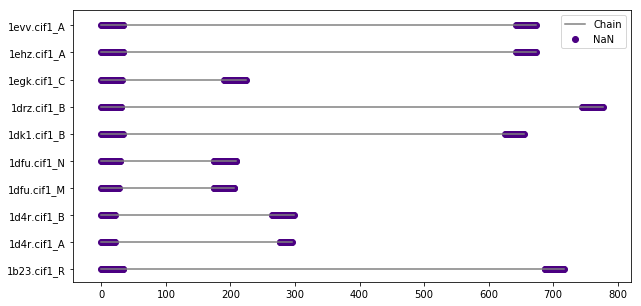

In [37]:
plt.figure(figsize=(10,5))
k=10
for i,chain in enumerate(chains[:k]):
    data_chain  = data.loc[data.pdb_chain.values == chain]
    nans = data_chain.isnull().any(axis=1)
    if i == 0:
        plt.plot(range(data_chain.shape[0]), np.repeat(i,data_chain.shape[0]), color = 'grey', label='Chain')
        plt.scatter(np.arange(data_chain.shape[0])[nans==1], np.repeat(i,np.sum(nans==1)), color = 'indigo', label='NaN')
    else:
        plt.plot(range(data_chain.shape[0]), np.repeat(i,data_chain.shape[0]), color = 'grey')
        plt.scatter(np.arange(data_chain.shape[0])[nans==1], np.repeat(i,np.sum(nans==1)), color = 'indigo')        
plt.yticks(range(k), chains[:k])
plt.legend()
plt.show()

In [11]:
range(4)

range(0, 4)

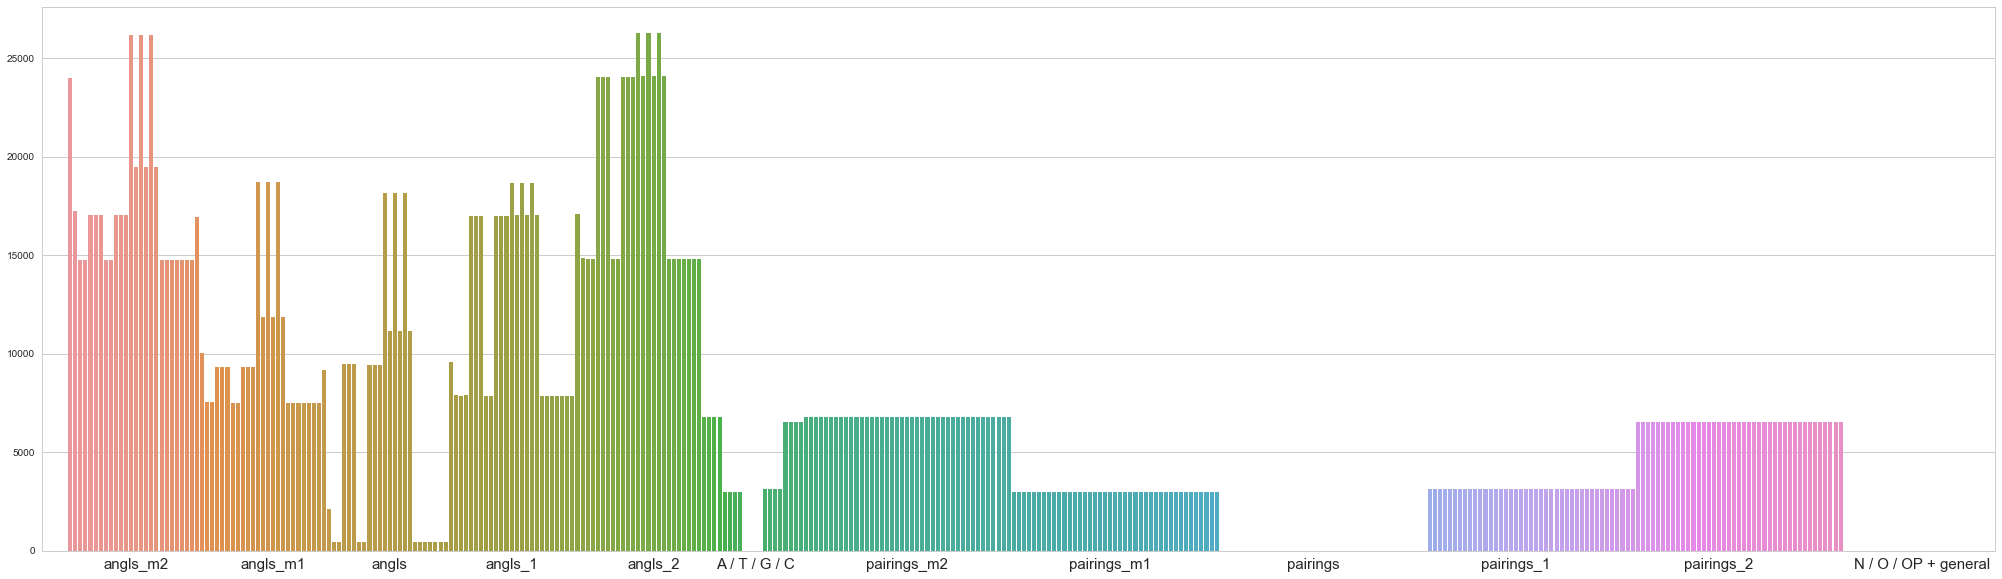

In [75]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(35, 10))
sns.barplot(list(range(len(data.columns))), np.sum(data.isnull(), axis=0), )#, color='indigo'
x_ticks = [18, 45, 68, 92, 120] + [140] + [170, 210, 250, 290, 330]+[370] #[0,1,2]+
x_labs = (['angls_m2', 'angls_m1', 'angls', 'angls_1', 'angls_2']+ ['A / T / G / C']+
         ['pairings_m2', 'pairings_m1', 'pairings', 'pairings_1', 'pairings_2']+['N / O / OP + general']) 
#list(data.columns)[:3]+
plt.xticks(x_ticks, x_labs, fontsize=15); #, rotation=70

In [58]:
list(data.columns)[:3]

['pdb_chain', 'xray', 'resol']

In [44]:
np.sum(data.isnull(), axis=0)

pdb_chain            0
xray                 0
resol                0
chainlen             0
protein              0
alpham2          23975
betam2           17224
gammam2          14774
deltam2          14774
epsilonm2        17027
zetam2           17027
e-zm2            17027
chim2            14754
phase-anglem2    14754
sszpm2           17027
dpm2             17027
splaym2          17027
etam2            26194
thetam2          19497
etapm2           26194
thetapm2         19497
etappm2          26194
thetappm2        19497
v0m2             14754
v1m2             14754
v2m2             14754
v3m2             14754
v4m2             14754
tmm2             14754
pm2              14754
                 ...  
stem                 0
hairpin              0
bulge                0
internal             0
junction             0
wtlen                0
wtnum                0
moietyP              0
moietyB              0
moietyR              0
atomO                0
atomN                0
atomN1     